In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('ETH2019-2024.csv')
df1 = df.reset_index()['Open']

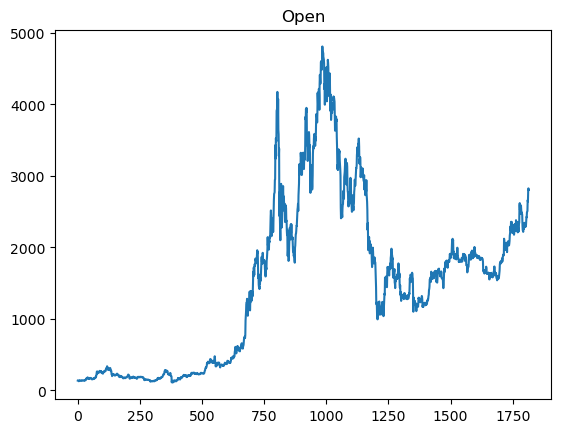

In [3]:
plt.plot(df1)
plt.title("Open")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1169, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.23481956, 0.23703666, 0.25701846, 0.25309582, 0.26487096,
       0.24879607, 0.2576379 , 0.25509933, 0.25662175, 0.2461897 ,
       0.26055188, 0.25980081, 0.25983119, 0.2587304 , 0.25980198,
       0.2761797 , 0.2753906 , 0.25618778, 0.24006659, 0.24238288,
       0.24256421, 0.23515907, 0.2444228 , 0.24422493, 0.24513969,
       0.24439755, 0.24251435, 0.23695374, 0.24330716, 0.2412229 ,
       0.2362202 , 0.23714566, 0.23732661, 0.23914441, 0.24070027,
       0.24123812, 0.24129296, 0.2561539 , 0.25746229, 0.25653856,
       0.25498172, 0.25583072, 0.27386931, 0.27613065, 0.29012236,
       0.29888137, 0.3048754 , 0.3089877 , 0.31054965, 0.30965406,
       0.30915334, 0.31354359, 0.31065517, 0.32213886, 0.32463194,
       0.32688839, 0.32558237, 0.31536715, 0.32390701, 0.32157732,
       0.32362363, 0.31744277, 0.32780868, 0.3156533 , 0.31811623,
       0.32916686, 0.33075552, 0.33027878, 0.32956793, 0.32975665,
       0.32698738, 0.32885794, 0.33127599, 0.31570222, 0.31159

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.23174668, 0.23430553, 0.24833096, 0.24687136, 0.2544846 ,
       0.2447856 , 0.25019355, 0.25052258, 0.25152349, 0.24454771,
       0.25365103, 0.25504803, 0.25473004, 0.2541122 , 0.25471538,
       0.26792059, 0.26763961, 0.2563912 , 0.23713579, 0.24330692,
       0.24023159, 0.23314433, 0.24210675, 0.2416686 , 0.24196149,
       0.24077918, 0.23817191, 0.23593368, 0.23881576, 0.23686002,
       0.23580286, 0.23646879, 0.23712252, 0.23720064, 0.23737863,
       0.23754214, 0.23815818, 0.24659833, 0.24748993, 0.2491012 ,
       0.24869355, 0.24923434, 0.26460297, 0.26730429, 0.28468339,
       0.29000788, 0.29876993, 0.30921219, 0.31063255, 0.31106013,
       0.3099915 , 0.31054593, 0.31059982, 0.32624278, 0.32650096,
       0.32671098, 0.32574251, 0.31563359, 0.32553085, 0.32186957,
       0.32171555, 0.31427231, 0.32811021, 0.31451305, 0.3150559 ,
       0.32729876, 0.33062829, 0.33129295, 0.33169746, 0.3312922 ,
       0.32939078, 0.33271652, 0.33556493, 0.31757544, 0.30984

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))
test_rmse = np.sqrt(np.mean((bagged_y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((bagged_y_pred - y_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Random Forest: 0.0002
Bagging: 0.0001
Testing RMSE: 0.010932627129421509
Testing MAPE: 2.143160857411179


### Trực quan

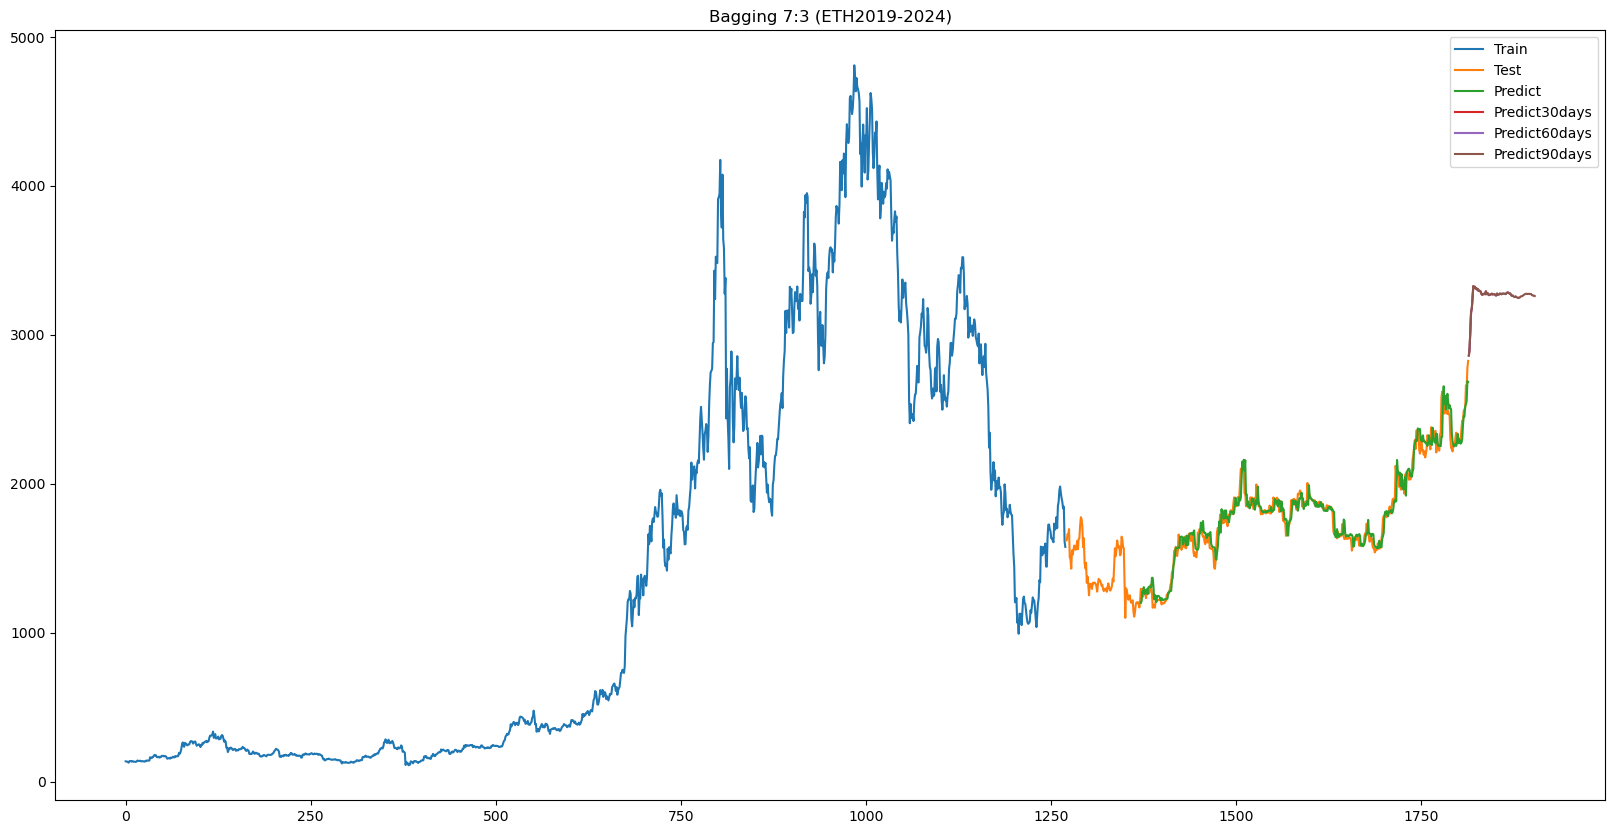

In [27]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 7:3 (ETH2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()